# Belgium Traffic Signal Classification

## Data Exploration 

Reference - https://www.datacamp.com/community/tutorials/tensorflow-tutorial#gs.C4=SPAQ

In [1]:
from data import belgiumTS
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import numpy as np

In [2]:
train_data_dir = "./data/Training/"
train_imgs, train_labels = belgiumTS.read_datasets_helper(train_data_dir)

In [3]:
print("Total data points in training: ", len(train_imgs))
print("Number of classes: ", len(set(train_labels)))

Total data points in training:  4575
Number of classes:  62


In [4]:
test_data_dir = "./data/Testing"
test_imgs, test_labels = belgiumTS.read_datasets_helper(test_data_dir)
print("Total data points in training: ", len(test_imgs))
print("Number of classes: ", len(set(test_labels)))

Total data points in training:  2520
Number of classes:  53


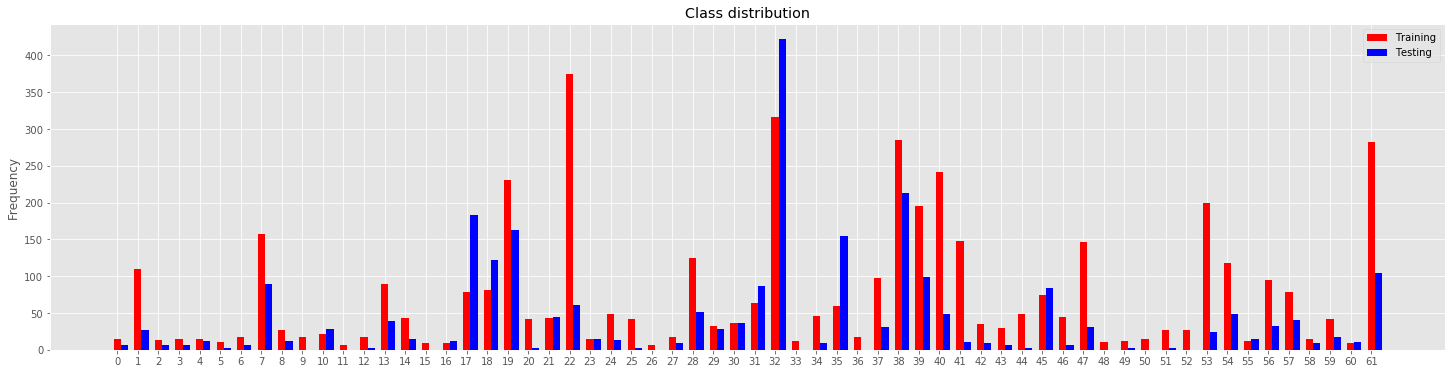

In [5]:
# class distribution
fig, ax = plt.subplots(figsize=(25,6))
ind = np.arange(len(set(train_labels)))
width = 0.35
rects1 = ax.bar(ind, np.bincount(train_labels), width, color='r')
rects2 = ax.bar(ind + width, np.bincount(test_labels), width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('Frequency')
ax.set_title('Class distribution')
ax.set_xticks(ind)
ax.legend((rects1[0], rects2[0]), ('Training', 'Testing'))
plt.show()

In [6]:
# a helper plotting function
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

(-0.5, 60.5, 61.5, -0.5)

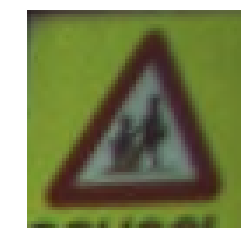

In [7]:
import skimage
plt.imshow(train_imgs[300])
plt.axis('off')

In [8]:
def plot_gallery(imgs, labels):
    idx_list = np.random.choice(np.arange(len(imgs)),4)
    plt.figure(figsize=(20,6))
    for idx in range(len(idx_list)):
        img = imgs[idx_list[idx]]
        label = labels[idx_list[idx]]
        plt.subplot(1, 4, idx+1)
        plt.axis('off')
        plt.imshow(img)
        plt.subplots_adjust(wspace=1.5)
        plt.title("Label: {0} \n shape: {1} \n min: {2} \n max: {3}".format(label,
                                                                      img.shape,
                                                                      img.min(), 
                                                                      img.max()))

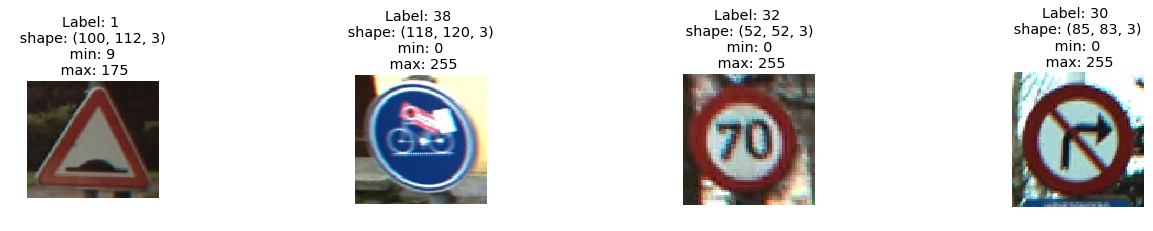

In [9]:
plot_gallery(train_imgs, train_labels)

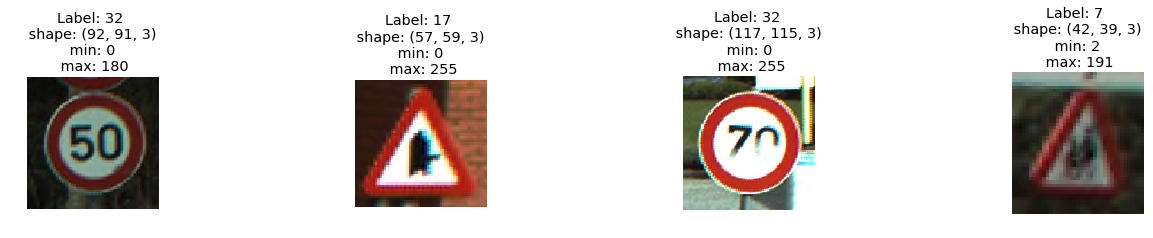

In [10]:
plot_gallery(test_imgs, test_labels)

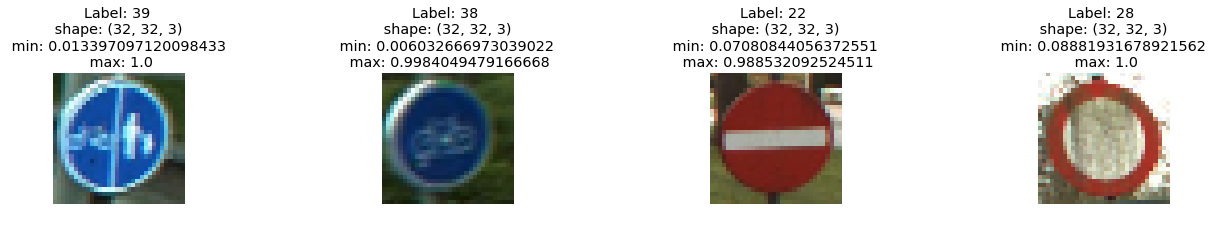

In [11]:
from skimage import transform
train_imgs32 = [transform.resize(image, (32,32)) for image in train_imgs]
plot_gallery(train_imgs32, train_labels)